In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, CuDNNLSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

import numpy as np

In [9]:
train_dir = 'C:/Users/KIIT/Desktop/CODES/Project/images/train'
val_dir = 'C:/Users/KIIT/Desktop/CODES/Project/images/validation'


image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2
)    

training_set = image_generator.flow_from_directory(batch_size=256,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                )

testing_set = image_generator.flow_from_directory(batch_size=128,
                                                 directory=val_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                 )

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [10]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [11]:
model = VGG19(
      input_shape = (48, 48, 3),
      include_top = False,
      weights = 'imagenet'
    )


In [12]:
for layers in model.layers:
    layers.trainable = False

In [13]:
x = Flatten()(model.output)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.5)(x)
x = Dense(14, activation = "relu")(x)
x = Dense(7, activation = "softmax")(x)

model = keras.Model(model.input, x)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [14]:
hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24656\3028496548.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)


Epoch 1/5
113/113 [==============================] - 824s 7s/step - loss: 1.8654 - accuracy: 0.2539 - val_loss: 1.7320 - val_accuracy: 0.3092
Epoch 2/5
113/113 [==============================] - 541s 5s/step - loss: 1.7128 - accuracy: 0.3154 - val_loss: 1.6683 - val_accuracy: 0.3394
Epoch 3/5
113/113 [==============================] - 650s 6s/step - loss: 1.6689 - accuracy: 0.3348 - val_loss: 1.6359 - val_accuracy: 0.3576
Epoch 4/5
113/113 [==============================] - 707s 6s/step - loss: 1.6409 - accuracy: 0.3505 - val_loss: 1.6091 - val_accuracy: 0.3772
Epoch 5/5
113/113 [==============================] - 792s 7s/step - loss: 1.6234 - accuracy: 0.3612 - val_loss: 1.6018 - val_accuracy: 0.3779


In [15]:
hist = hist.history

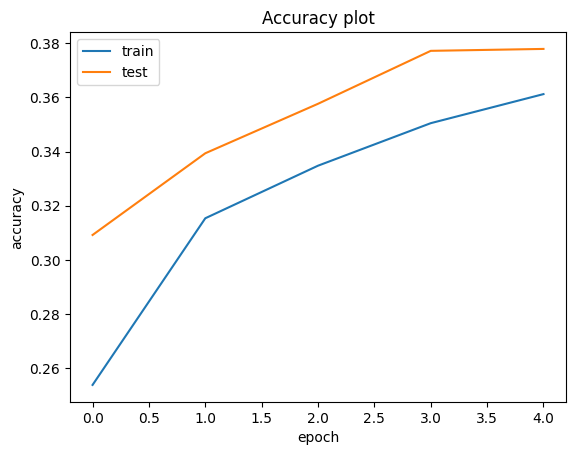

In [16]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("vgg19v2_accuracy.png")

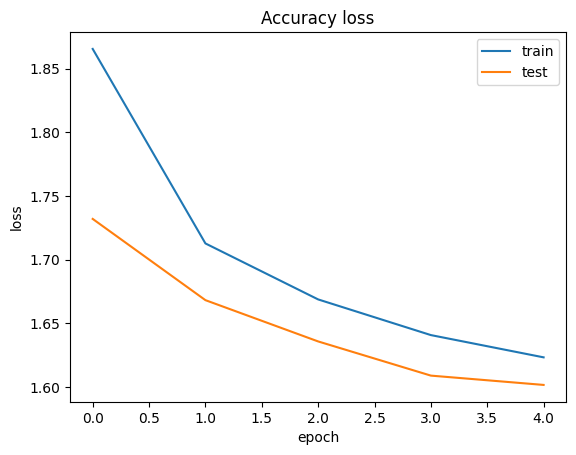

In [17]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("vgg19v2_loss.png")

We can notice that the accuracy is increasing as the number of epochs is increasing and loss is decreasing as the epochs is increasing

In [18]:
model.save("vgg19v2.h5")

113/113 [==============================] - 540s 5s/step
Confusion Matrix
[[  96    0  281 1783  538  775  520]
 [  15    0   25  195   57   89   55]
 [  96    0  285 1803  592  771  556]
 [ 158    0  511 3097 1065 1401  932]
 [ 132    0  372 2157  750  937  634]
 [ 129    0  348 2170  730  933  628]
 [  86    0  220 1415  449  612  423]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.02      0.04      3993
     disgust       0.00      0.00      0.00       436
        fear       0.14      0.07      0.09      4103
       happy       0.25      0.43      0.31      7164
     neutral       0.18      0.15      0.16      4982
         sad       0.17      0.19      0.18      4938
    surprise       0.11      0.13      0.12      3205

    accuracy                           0.19     28821
   macro avg       0.14      0.14      0.13     28821
weighted avg       0.17      0.19      0.17     28821



c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

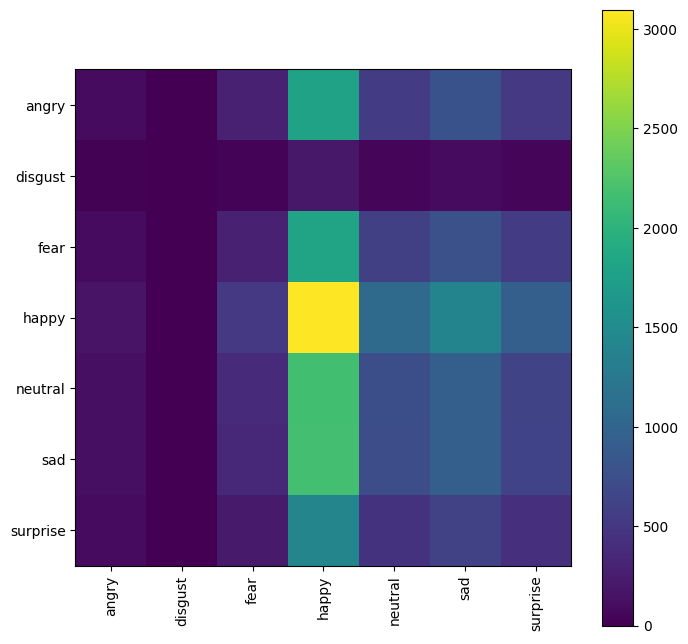

In [19]:
#Traning set matrix
y_pred = model.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = testing_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

56/56 [==============================] - 62s 1s/step
Confusion Matrix
[[ 25   0  65 431 139 176 124]
 [  5   0   9  49  18  19  11]
 [ 35   0  78 417 157 213 118]
 [ 50   0 137 801 241 353 243]
 [ 27   0 102 539 178 223 147]
 [ 19   0  87 499 176 228 130]
 [ 18   0  69 360 108 150  92]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.03      0.04       960
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.08      0.10      1018
       happy       0.26      0.44      0.33      1825
     neutral       0.18      0.15      0.16      1216
         sad       0.17      0.20      0.18      1139
    surprise       0.11      0.12      0.11       797

    accuracy                           0.20      7066
   macro avg       0.14      0.14      0.13      7066
weighted avg       0.18      0.20      0.17      7066



c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

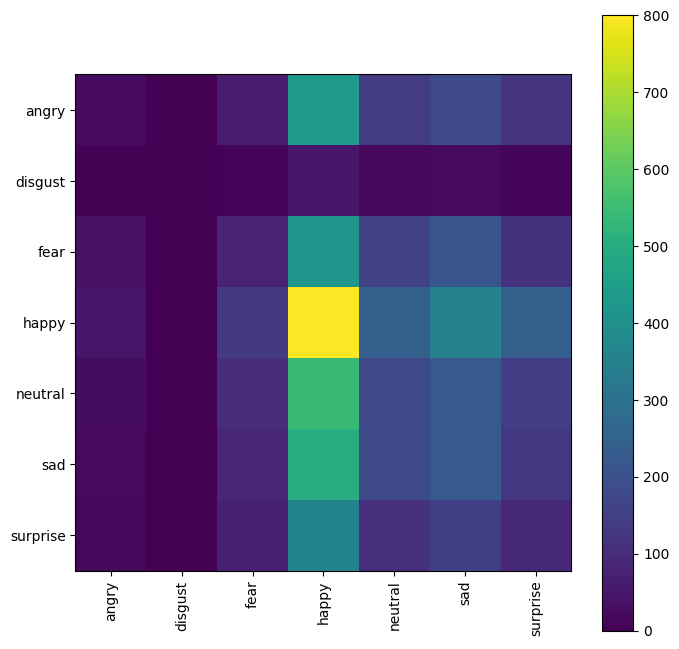

In [20]:
#TEST SET
y_pred = model.predict(testing_set)
y_pred = np.argmax(y_pred, axis=1)

cm_test = confusion_matrix(testing_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(testing_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)